<a href="https://colab.research.google.com/github/jcmachicao/modpred__evaluacion/blob/main/modpred__evaluacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Curso Modelamiento Predictivo**
---
# <font color='blue'>**Evaluación de Modelos**</font>
* Autor: José Carlos Machicao
* Licencia: [GestioDinámica](http://www.gestiodinamica.com) 2021

### Temas
* Cross Validation
* Curva ROC AUC
* Confusion Matrix

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix, confusion_matrix
from sklearn.model_selection import train_test_split, KFold
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB

In [3]:
ruta = 'drive/My Drive/2020 Cursos/2020 Modelamiento Predictivo/2021 ModPred EVAL/'
os.listdir(ruta)

['ActosViolentos.xlsx',
 'Actos_v2.xlsx',
 'bd_resultado.xlsx',
 'bd_manzanas.xlsx',
 'modpred_eval__soluciones.ipynb',
 'ModPred_Eval__Muestras.ipynb']

In [4]:
#data = pd.read_excel(ruta + 'ActosViolentos.xlsx')
data = pd.read_excel(ruta + 'bd_manzanas.xlsx')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   peso      91 non-null     int64  
 1   aroma     91 non-null     object 
 2   precio    91 non-null     int64  
 3   diametro  91 non-null     float64
 4   color     91 non-null     object 
 5   estado    91 non-null     object 
dtypes: float64(1), int64(2), object(3)
memory usage: 4.4+ KB


In [6]:
label = 'estado'
y_df = data[label]

In [7]:
var_cat, var_num = [], []
for a, b in zip(data.columns, data.dtypes):
  if a != label:
    if b == 'object':
      var_cat.append(a)
    else:
      var_num.append(a)
print(var_cat)
print(var_num)

['aroma', 'color']
['peso', 'precio', 'diametro']


In [8]:
data_cat = pd.get_dummies(data[var_cat], drop_first=True)
data_num = data[var_num]
X_df = pd.concat([data_cat, data_num], axis=1)
scl = MinMaxScaler()
scl.fit(X_df)
X = scl.transform(X_df).astype('float')
X.shape, type(X)

((91, 6), numpy.ndarray)

In [28]:
y_fac = y_df.factorize()
y = np.array(y_fac[0]).astype('float')
y_rot = y_fac[1]
y.shape, y_rot

((91,), Index(['comestible', 'malogrado'], dtype='object'))

In [29]:
from sklearn.linear_model import LogisticRegression
mod = LogisticRegression()
mod.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

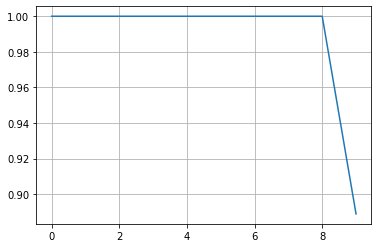

In [30]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mod, X, y, cv=10)
plt.figure(facecolor='white')
plt.plot(scores)
plt.grid(True)
plt.show()

In [45]:
y_pred = mod.predict(X)
y_pred

array([0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
       1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

In [48]:
y_pred_lab = y_rot[y_pred.astype('int')]
y_pred_lab[0:10]

Index(['comestible', 'comestible', 'comestible', 'malogrado', 'malogrado',
       'malogrado', 'malogrado', 'comestible', 'comestible', 'comestible'],
      dtype='object')

In [53]:
data['y_pred'] = y_pred
data['y_pred_lab'] = y_pred_lab

In [54]:
data.to_excel(ruta + 'bd_resultado.xlsx')

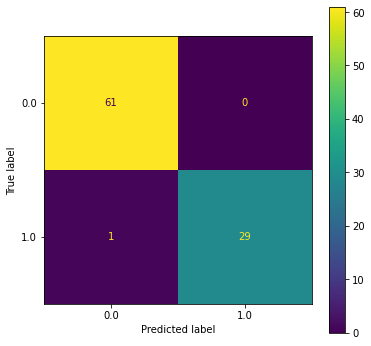

In [55]:
fig, ax = plt.subplots(figsize=(6,6), facecolor='white')
plot_confusion_matrix(mod, X, y, ax=ax)
plt.show()

In [56]:
y_score = mod.predict_proba(X)[:,1]

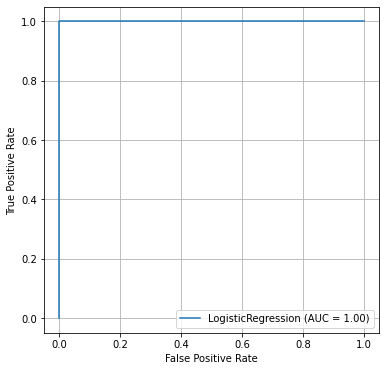

In [57]:
fig, ax = plt.subplots(figsize=(6,6), facecolor='white')
plot_roc_curve(mod, X, y, ax=ax)
plt.grid(True)
plt.show()

In [58]:
X[0]

array([0.        , 0.        , 0.        , 0.84      , 0.33333333,
       0.82758621])

In [59]:
y_test = mod.predict(np.array([[1.0, 0.0, 0.0, 0.8, 0.8, 0.1]]))
y_test

array([1.])

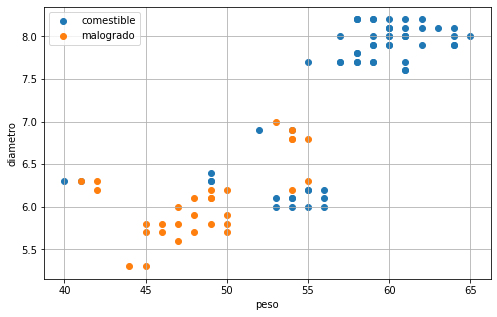

In [60]:
lab_res = 'estado'
lab_x, lab_y = 'peso', 'diametro'
plt.figure(figsize=(8,5), facecolor='white')
plt.scatter(data[data[lab_res]==y_rot[0]][lab_x], data[data[lab_res]==y_rot[0]][lab_y], label=y_rot[0])
plt.scatter(data[data[lab_res]==y_rot[1]][lab_x], data[data[lab_res]==y_rot[1]][lab_y], label=y_rot[1])
plt.xlabel(lab_x)
plt.ylabel(lab_y)
plt.legend(loc='best')
plt.grid(True)
plt.show()

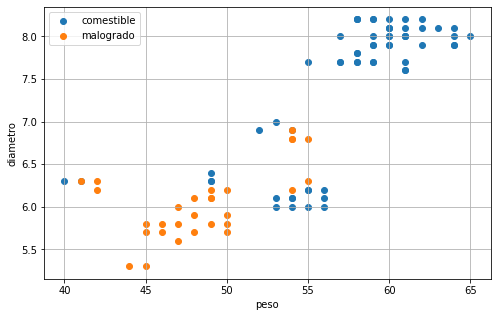

In [61]:
lab_res = 'y_pred_lab'
lab_x, lab_y = 'peso', 'diametro'
plt.figure(figsize=(8,5), facecolor='white')
plt.scatter(data[data[lab_res]==y_rot[0]][lab_x], data[data[lab_res]==y_rot[0]][lab_y], label=y_rot[0])
plt.scatter(data[data[lab_res]==y_rot[1]][lab_x], data[data[lab_res]==y_rot[1]][lab_y], label=y_rot[1])
plt.xlabel(lab_x)
plt.ylabel(lab_y)
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Referencias

https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_display_object_visualization.html#sphx-glr-auto-examples-miscellaneous-plot-display-object-visualization-py

https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html#sphx-glr-auto-examples-model-selection-plot-roc-crossval-py

